# CAT BOOST CLASSIFIER ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('CYBER.csv')

In [4]:
del df["'TotLen Fwd Pkts'"]
del df["'TotLen Bwd Pkts'"]
del df["'Fwd Pkt Len Max'"]
del df["'Fwd Pkt Len Min'"]
del df["'Fwd Pkt Len Mean'"]
del df["'Fwd Pkt Len Std'"]
del df["'Bwd Pkt Len Max'"]
del df["'Bwd Pkt Len Mean'"]
del df["'Idle Std'"]
del df["'Flow Byts/s'"]
del df["'Flow IAT Std'"]
del df["'Flow IAT Min'"]
del df["'Pkt Len Max'"]
del df["'Bwd Pkt Len Min'"]
del df["'Flow IAT Max'"]
del df["'Fwd IAT Max'"]
del df["'Fwd IAT Min'"]
del df["'Bwd IAT Std'"]
del df["'Bwd IAT Max'"]
del df["'Fwd IAT Std'"]
del df["'Bwd IAT Min'"]
del df["'Bwd PSH Flags'"]
del df["'Bwd URG Flags'"]
del df["'Pkt Len Min'"]
del df["'Pkt Len Std'"]
del df["'Pkt Len Var'"]
del df["'FIN Flag Cnt'"]
del df["'RST Flag Cnt'"]
del df["'PSH Flag Cnt'"]
del df["'ACK Flag Cnt'"]
del df["'URG Flag Cnt'"]
del df["'CWE Flag Count'"]

In [5]:
df.columns

Index([''Flow Duration'', ''Tot Fwd Pkts'', ''Tot Bwd Pkts'',
       ''Bwd Pkt Len Std'', ''Flow Pkts/s'', ''Flow IAT Mean'',
       ''Fwd IAT Tot'', ''Fwd IAT Mean'', ''Bwd IAT Tot'', ''Bwd IAT Mean'',
       ''Fwd Header Len'', ''Bwd Header Len'', ''Fwd Pkts/s'', ''Bwd Pkts/s'',
       ''Pkt Len Mean'', ''SYN Flag Cnt'', ''ECE Flag Cnt'', ''Down/Up Ratio'',
       ''Pkt Size Avg'', ''Fwd Seg Size Avg'', ''Bwd Seg Size Avg'',
       ''Subflow Fwd Pkts'', ''Subflow Fwd Byts'', ''Subflow Bwd Pkts'',
       ''Subflow Bwd Byts'', ''Init Bwd Win Byts'', ''Fwd Act Data Pkts'',
       ''Active Mean'', ''Active Std'', ''Active Max'', ''Active Min'',
       ''Idle Mean'', ''Idle Max'', ''Idle Min'', 'Label'],
      dtype='object')

In [6]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','Bwd Pkt Len Std','Flow Pkts/s','Flow IAT Mean','Fwd IAT Tot','Fwd IAT Mean','Bwd IAT Tot','Bwd IAT Mean',...,'Init Bwd Win Byts','Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Max','Idle Min',Label
0,1518,2,5,168.5995,4611.3307,253.0000,487,487.0000,1518,379.5,...,46,1,0,0,0,0,0,0,0,Brute_Force
1,5894,4,8,744.4771,2035.9688,535.8182,5583,1861.0000,5894,842.0,...,54,1,0,0,0,0,0,0,0,Brute_Force
2,272,1,1,0.0000,7352.9412,272.0000,0,0.0000,0,0.0,...,4106,0,0,0,0,0,0,0,0,Brute_Force
3,2611,4,8,750.2544,4595.9403,237.3636,2351,783.6667,2611,373.0,...,54,1,0,0,0,0,0,0,0,Brute_Force
4,294,1,1,0.0000,6802.7211,294.0000,0,0.0000,0,0.0,...,4106,0,0,0,0,0,0,0,0,Brute_Force


In [7]:
nsdf=df.dropna()

In [8]:
df['Label'].value_counts()

Label
Brute_Force    88502
Normal         28502
Port_Scan      11081
HTTP_DDoS        641
ICMP_Flood        45
Web_Crwling       28
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Label']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [10]:
df['Label'].value_counts()

Label
0    88502
3    28502
4    11081
1      641
2       45
5       28
Name: count, dtype: int64

In [11]:
df.head()

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','Bwd Pkt Len Std','Flow Pkts/s','Flow IAT Mean','Fwd IAT Tot','Fwd IAT Mean','Bwd IAT Tot','Bwd IAT Mean',...,'Init Bwd Win Byts','Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Max','Idle Min',Label
0,1518,2,5,168.5995,4611.3307,253.0000,487,487.0000,1518,379.5,...,46,1,0,0,0,0,0,0,0,0
1,5894,4,8,744.4771,2035.9688,535.8182,5583,1861.0000,5894,842.0,...,54,1,0,0,0,0,0,0,0,0
2,272,1,1,0.0000,7352.9412,272.0000,0,0.0000,0,0.0,...,4106,0,0,0,0,0,0,0,0,0
3,2611,4,8,750.2544,4595.9403,237.3636,2351,783.6667,2611,373.0,...,54,1,0,0,0,0,0,0,0,0
4,294,1,1,0.0000,6802.7211,294.0000,0,0.0000,0,0.0,...,4106,0,0,0,0,0,0,0,0,0


In [12]:
df=df.drop_duplicates()

In [13]:
# Split the datasets into dependent and independent variable
# X is independent variable (Input features)
x1 = df.drop(labels='Label', axis=1)

# Y is dependent variable (Target variable)
y1 = df.loc[:,'Label']

In [14]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 61995, 3: 26204, 4: 3292, 1: 441, 2: 45, 5: 28})
OVER SAMPLING DATA COUNT  :  Counter({0: 61995, 1: 61995, 2: 61995, 3: 61995, 4: 61995, 5: 61995})


In [15]:
# Splitting the dataset into trainng and testing variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  297576
NUMBER OF TEST DATASET      :  74394
TOTAL NUMBER OF DATASET    :  371970


In [16]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  297576
NUMBER OF TEST DATASET      :  74394
TOTAL NUMBER OF DATASET    :  371970


In [17]:
# Implementing Catboost classifier algorithm.
from catboost import CatBoostClassifier

In [18]:
CBC = CatBoostClassifier()
# Fit is the training function for this algorithm.
CBC.fit(x_train,y_train)

Learning rate set to 0.105798
0:	learn: 1.4435566	total: 327ms	remaining: 5m 26s
1:	learn: 1.2412803	total: 507ms	remaining: 4m 12s
2:	learn: 1.0863673	total: 725ms	remaining: 4m
3:	learn: 0.9707086	total: 950ms	remaining: 3m 56s
4:	learn: 0.8803681	total: 1.17s	remaining: 3m 53s
5:	learn: 0.8023164	total: 1.39s	remaining: 3m 49s
6:	learn: 0.7445300	total: 1.57s	remaining: 3m 43s
7:	learn: 0.6904436	total: 1.78s	remaining: 3m 40s
8:	learn: 0.6427423	total: 1.98s	remaining: 3m 38s
9:	learn: 0.6006559	total: 2.24s	remaining: 3m 42s
10:	learn: 0.5638493	total: 2.44s	remaining: 3m 39s
11:	learn: 0.5343023	total: 2.64s	remaining: 3m 37s
12:	learn: 0.4974634	total: 2.89s	remaining: 3m 39s
13:	learn: 0.4673488	total: 3.15s	remaining: 3m 41s
14:	learn: 0.4446606	total: 3.38s	remaining: 3m 41s
15:	learn: 0.4227096	total: 3.59s	remaining: 3m 40s
16:	learn: 0.4059149	total: 3.81s	remaining: 3m 40s
17:	learn: 0.3876165	total: 4.06s	remaining: 3m 41s
18:	learn: 0.3716373	total: 4.32s	remaining: 3m 

In [19]:
# Predict is the test function for this algorithm.
predicted = CBC.predict(x_test)

In [20]:
# Checking the classification report for this algorithm.
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF CAT BOOST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF CAT BOOST CLASSIFIER:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12399
           1       1.00      1.00      1.00     12399
           2       1.00      1.00      1.00     12399
           3       1.00      1.00      1.00     12399
           4       1.00      1.00      1.00     12399
           5       1.00      1.00      1.00     12399

    accuracy                           1.00     74394
   macro avg       1.00      1.00      1.00     74394
weighted avg       1.00      1.00      1.00     74394



In [21]:
# Printing the confusion matrix for this algorithm.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF CAT BOOST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF CAT BOOST CLASSIFIER:


 [[12394     2     0     3     0     0]
 [    0 12371     0     0     0    28]
 [    0     0 12399     0     0     0]
 [    2    13     3 12368     5     8]
 [    0    42     0     4 12353     0]
 [    0     0     0     0     0 12399]]


In [22]:
# Computing the cross value score of this algorithm.
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(CBC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

Learning rate set to 0.105798
0:	learn: 1.4401575	total: 223ms	remaining: 3m 42s
1:	learn: 1.2500972	total: 431ms	remaining: 3m 35s
2:	learn: 1.0936140	total: 680ms	remaining: 3m 46s
3:	learn: 0.9778496	total: 929ms	remaining: 3m 51s
4:	learn: 0.8865224	total: 1.16s	remaining: 3m 51s
5:	learn: 0.8097902	total: 1.39s	remaining: 3m 50s
6:	learn: 0.7467318	total: 1.65s	remaining: 3m 54s
7:	learn: 0.6941737	total: 1.89s	remaining: 3m 54s
8:	learn: 0.6473834	total: 2.11s	remaining: 3m 52s
9:	learn: 0.6062322	total: 2.35s	remaining: 3m 52s
10:	learn: 0.5715240	total: 2.57s	remaining: 3m 50s
11:	learn: 0.5388424	total: 2.78s	remaining: 3m 48s
12:	learn: 0.5013753	total: 3.01s	remaining: 3m 48s
13:	learn: 0.4716347	total: 3.28s	remaining: 3m 51s
14:	learn: 0.4444640	total: 3.51s	remaining: 3m 50s
15:	learn: 0.4197791	total: 3.76s	remaining: 3m 51s
16:	learn: 0.4024658	total: 4.01s	remaining: 3m 51s
17:	learn: 0.3833857	total: 4.28s	remaining: 3m 53s
18:	learn: 0.3646206	total: 4.55s	remaining:

In [23]:
# Printing the accuracy score of this algorithm.
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF CAT BOOST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF CAT BOOST CLASSIFIER IS : 99.85213861332903


In [24]:
# Checking the hamming loss of this algorithm.
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF CAT BOOST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF CAT BOOST CLASSIFIER IS : 0.1478613866709681


THE CONFUSION MATRIX SCORE OF CAT BOOST CLASSIFIER:


[[12394     2     0     3     0     0]
 [    0 12371     0     0     0    28]
 [    0     0 12399     0     0     0]
 [    2    13     3 12368     5     8]
 [    0    42     0     4 12353     0]
 [    0     0     0     0     0 12399]]


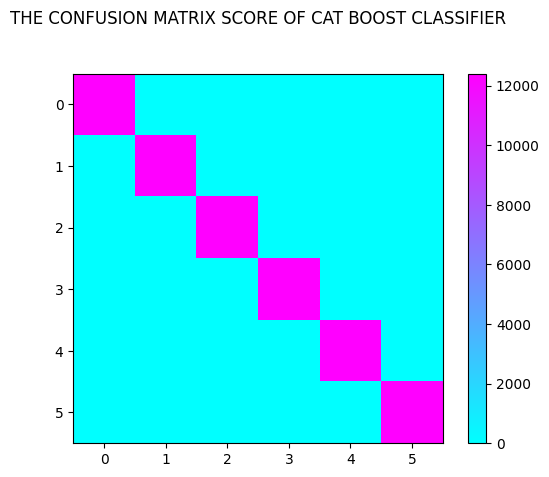

In [25]:
# Plotting a Confusion matrix for this algorithm.
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF CAT BOOST CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF CAT BOOST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

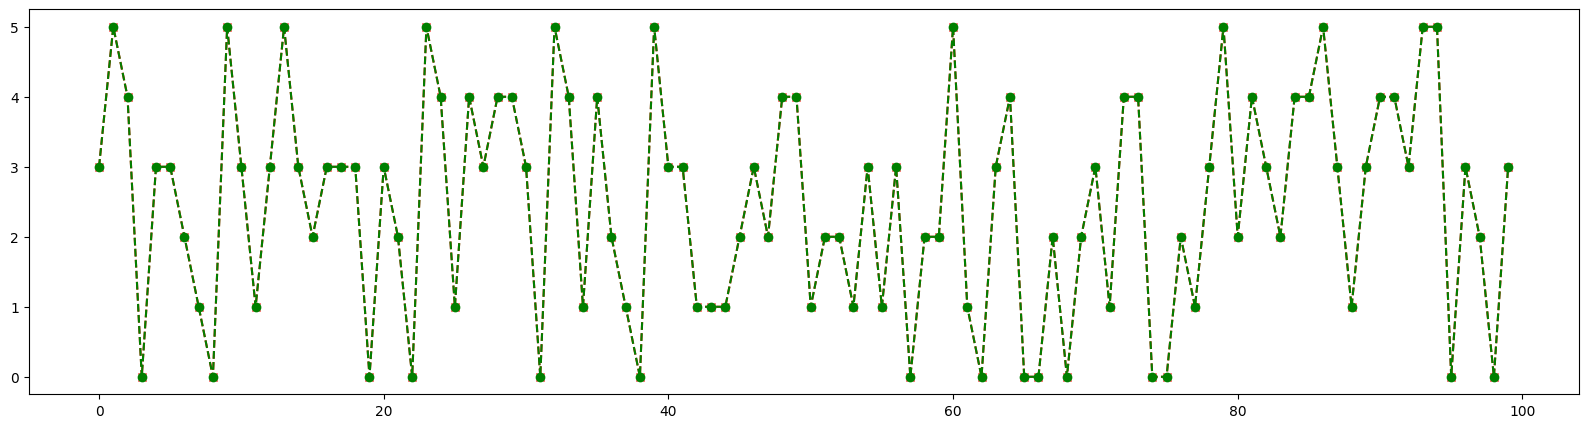

In [26]:
# Plotting the worm plot for this model.
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [27]:
# Build a model in catboosting algorithms
import joblib
joblib.dump(CBC, 'proj.pkl')

['proj.pkl']